In [1]:
import numpy as np
from test import test
from util import exponential_decay, inverse_decay, tanh_decay
import matplotlib.pyplot as plt
import visualize
from stats import *

In [2]:
import matplotlib._color_data as mcd
palette = list(mcd.XKCD_COLORS.values())[::10]

In [3]:
topics = np.array([[-1, 1]])

In [4]:
varied_param = 'num_agents'
varied_param_legend_label = 'Number of Agents'
varied_param_x_label = 'Number of Agents'

In [5]:
num_influencers = 1
num_agents = [2, 5, 10, 15, 25]

varied_param_values = num_agents

In [6]:
perfect_info_stats, imperfect_info_stats = test(
    topics=topics,
    varied_param=varied_param,
    num_influencers=num_influencers,
    num_agents=num_agents,
    producer_topic_interest_func=None,
    consumer_topic_interest_func=None,
    agent_topic_interest_func=lambda x: inverse_decay(x, 1, 2),
    consumer_attention_bound=20,
    consumer_external_interest_prob=2,
    delay_sensitivity=1,
    consumer_delay_sensitivity=None,
    influencer_attention_bound=40,
    influencer_delay_sensitivity=None,
    init_following_rates_method='equal',
    init_interest_method='even',
    init_topic_produced_method='main',
    production_rate=1,
    external_production_rate=1,
    use_imperfect_information=True,
)

Optimizing consumer 0
Optimizing consumer 1
Optimizing influencer 2
Optimizing producer 0
Optimization succeeded (overall 0.010511817003134638s): nit=12, nfev=26, njev=13.
Optimizing producer 1
Optimization succeeded (overall 0.007614906000526389s): nit=12, nfev=26, njev=13.
Iteration 0 / 100 done in 0.06287790199712617 seconds.
Total Social Welfare: 4.438557049833612
Optimizing consumer 0
Optimizing consumer 1
Optimizing influencer 2
Optimizing producer 0
Optimization succeeded (overall 0.0016322880001098383s): nit=0, nfev=2, njev=1.
Optimizing producer 1
Optimization succeeded (overall 0.0013871809969714377s): nit=0, nfev=2, njev=1.
Iteration 1 / 100 done in 0.12394338000012795 seconds.
Total Social Welfare: 4.440190948002352
Consumer rate change: 0.6967895181745695
Consumer utility change: 0.0003679790918713276%
Influencer rate change: 0.0
Influencer utility change: 0.016681730339663064%
Producer topic change: 0.0
Producer utility change: 0.019904247125524546%
Converged. Optimizatio

Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing influencer 5
Optimizing producer 0
Optimization succeeded (overall 0.009829705999436555s): nit=4, nfev=12, njev=6.
Optimizing producer 1
Optimization succeeded (overall 0.010226591002719942s): nit=3, nfev=10, njev=5.
Optimizing producer 2
Optimization succeeded (overall 0.0022998989988991525s): nit=0, nfev=2, njev=1.
Optimizing producer 3
Optimization succeeded (overall 0.009456561998376856s): nit=3, nfev=10, njev=5.
Optimizing producer 4
Optimization succeeded (overall 0.00897696800166159s): nit=4, nfev=12, njev=6.
Iteration 0 / 100 done in 0.6253132550009468 seconds.
Total Social Welfare: 24.705348056701272
Optimizing consumer 0
Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing influencer 5
Optimizing producer 0
Optimization succeeded (overall 0.009875835999991978s): nit=2, nfev=8, njev=4.
Optimizing producer 1
Optimization succeeded (ove

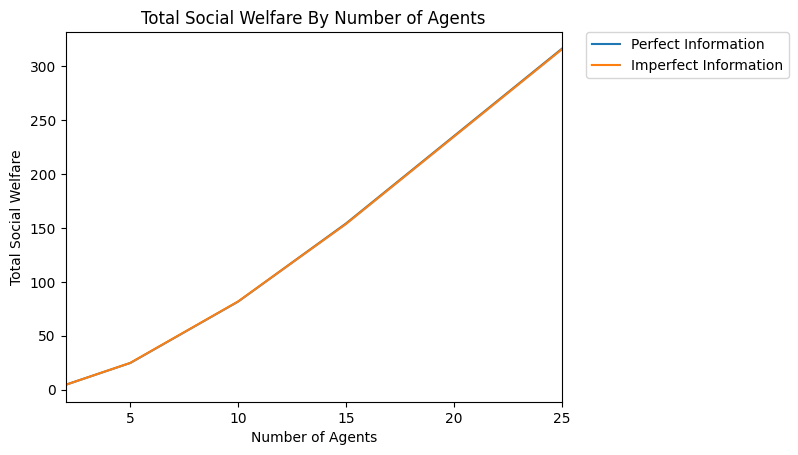

In [7]:
visualize.plot_ending_value_by_test(f"Total Social Welfare By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'total_social_welfare', varied_param_values, varied_param_x_label, 'Total Social Welfare')

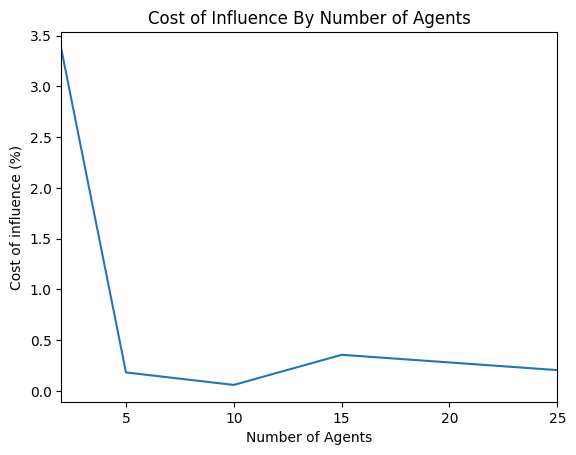

In [8]:
visualize.plot_cost_of_influence_by_test(f"Cost of Influence By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, varied_param_values, varied_param_x_label, 'Cost of Influence')

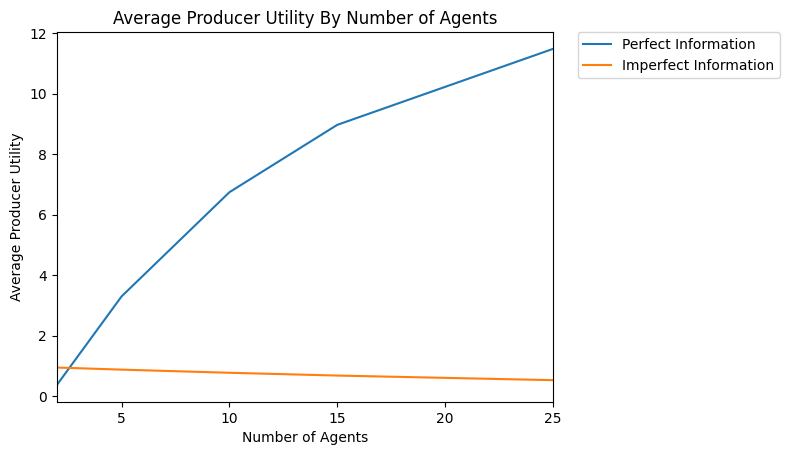

In [9]:
visualize.plot_ending_value_by_test(f"Average Producer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_producer_utility', varied_param_values, varied_param_x_label, 'Average Producer Utility')

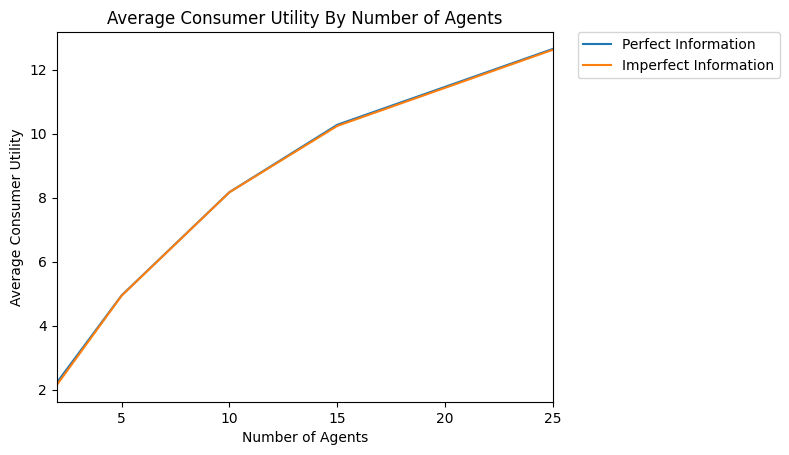

In [10]:
visualize.plot_ending_value_by_test(f"Average Consumer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_consumer_utility', varied_param_values, varied_param_x_label, 'Average Consumer Utility')

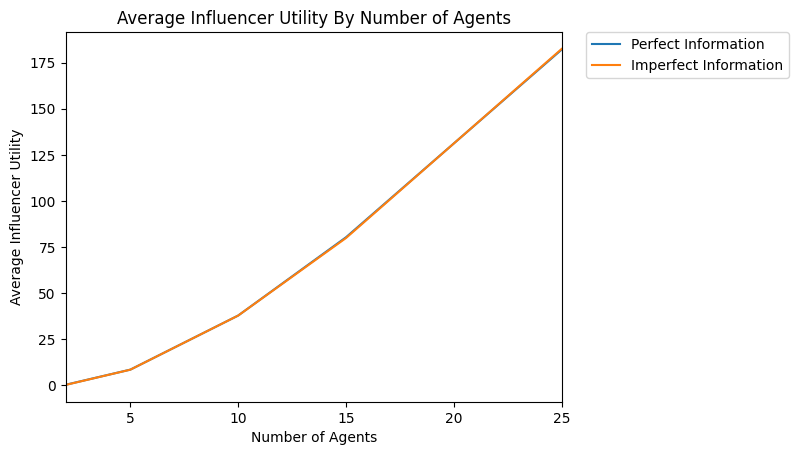

In [11]:
visualize.plot_ending_value_by_test(f"Average Influencer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_utility', varied_param_values, varied_param_x_label, 'Average Influencer Utility')

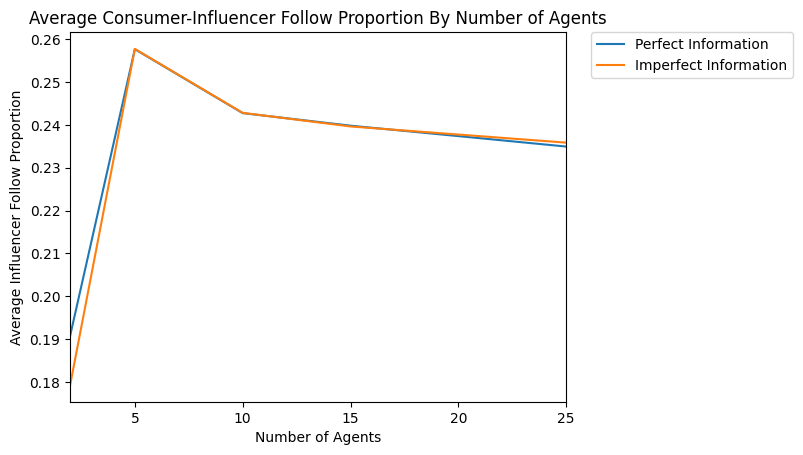

In [12]:
visualize.plot_ending_value_by_test(f"Average Consumer-Influencer Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_follow_proportion', varied_param_values, varied_param_x_label, 'Average Influencer Follow Proportion')

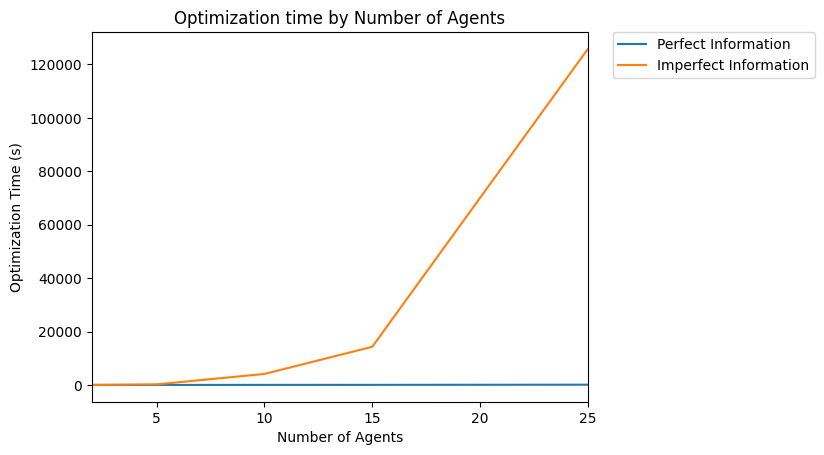

In [13]:
visualize.plot_value_by_test(f"Optimization time by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'optimization_time', varied_param_values, varied_param_x_label, 'Optimization Time (s)')

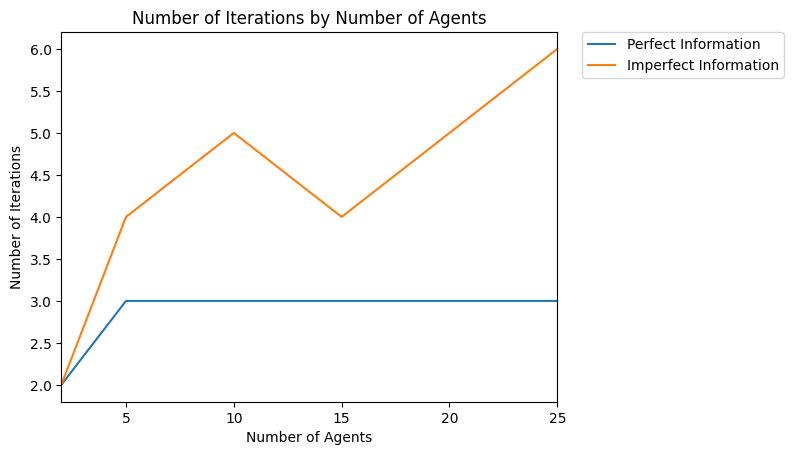

In [14]:
visualize.plot_value_by_test(f"Number of Iterations by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'num_iterations', varied_param_values, varied_param_x_label, 'Number of Iterations')

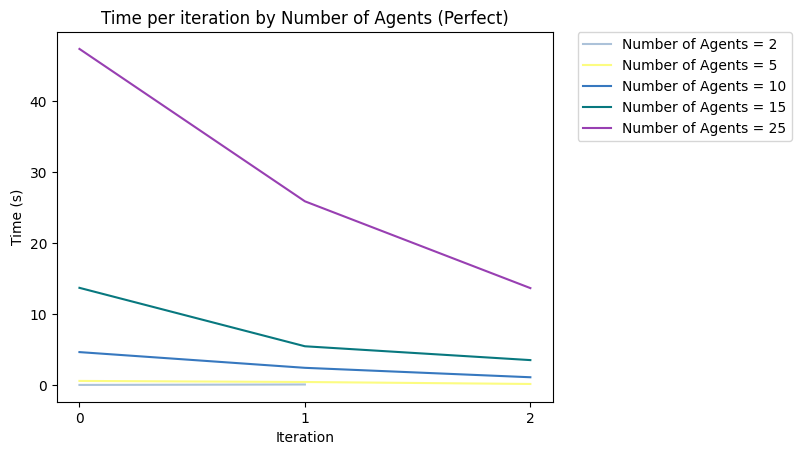

In [15]:
visualize.plot_value_by_iteration_by_test(f"Time per iteration by {varied_param_x_label} (Perfect)", perfect_info_stats, 'optimization_times', varied_param_legend_label, varied_param_values, 'Time (s)')

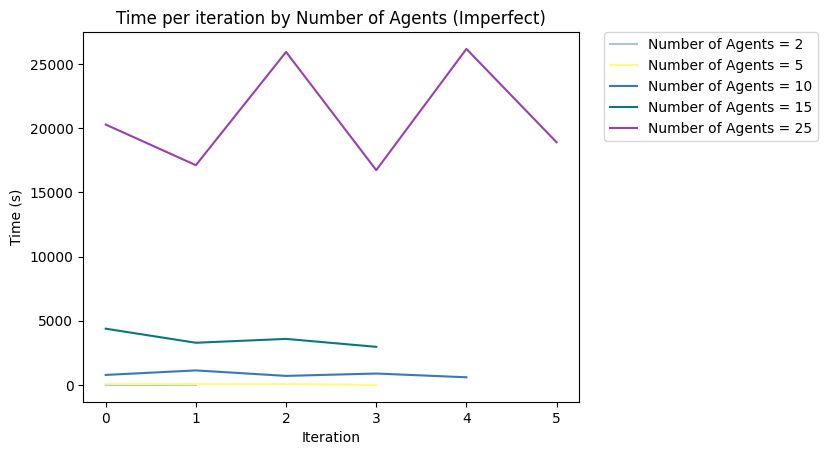

In [16]:
visualize.plot_value_by_iteration_by_test(f"Time per iteration by {varied_param_x_label} (Imperfect)", imperfect_info_stats, 'optimization_times', varied_param_legend_label, varied_param_values, 'Time (s)')

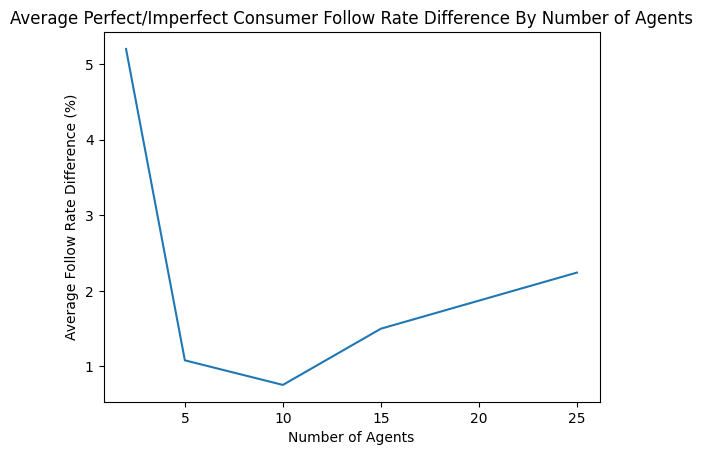

In [17]:
avg_follow_rate_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_follow_rate_diff = 0

    for index in perfect_stat.consumer_stats:
        perfect_consumer_stat = perfect_stat.consumer_stats[index]
        imperfect_consumer_stat = imperfect_stat.consumer_stats[index]

        ending_follow_rate_diff = np.linalg.norm(perfect_consumer_stat.following_rates[-1] - imperfect_consumer_stat.following_rates[-1]) / np.linalg.norm(perfect_consumer_stat.following_rates[-1] + 1e-10) * 100
        avg_follow_rate_diff += ending_follow_rate_diff
    
    avg_follow_rate_diff /= len(perfect_stat.consumer_stats)
    avg_follow_rate_diffs.append(avg_follow_rate_diff)

plt.figure()
plt.title(f"Average Perfect/Imperfect Consumer Follow Rate Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Follow Rate Difference (%)")
plt.plot(varied_param_values, avg_follow_rate_diffs)
#plt.ylim(0, 10)
plt.show()

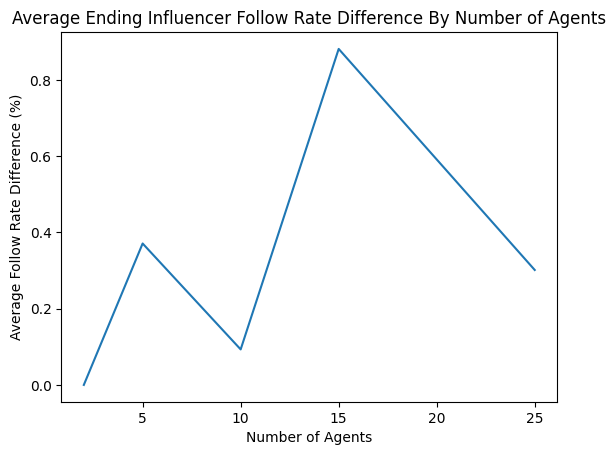

In [18]:
avg_follow_rate_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_follow_rate_diff = 0

    for index in perfect_stat.influencer_stats:
        perfect_influencer_stat = perfect_stat.influencer_stats[index]
        imperfect_influencer_stat = imperfect_stat.influencer_stats[index]

        ending_follow_rate_diff = np.linalg.norm(perfect_influencer_stat.following_rates[-1] - imperfect_influencer_stat.following_rates[-1]) / np.linalg.norm(perfect_influencer_stat.following_rates[-1]) * 100
        avg_follow_rate_diff += ending_follow_rate_diff
    
    avg_follow_rate_diff /= len(perfect_stat.influencer_stats)
    avg_follow_rate_diffs.append(avg_follow_rate_diff)

plt.figure()
plt.title(f"Average Ending Influencer Follow Rate Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Follow Rate Difference (%)")
plt.plot(varied_param_values, avg_follow_rate_diffs)
#plt.ylim(0, 10)
plt.show()

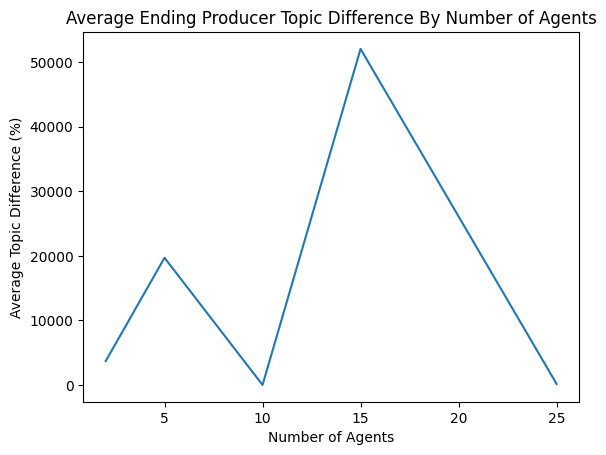

In [19]:
avg_topic_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_topic_diff = 0

    for index in perfect_stat.producer_stats:
        perfect_producer_stat = perfect_stat.producer_stats[index]
        imperfect_producer_stat = imperfect_stat.producer_stats[index]

        ending_topic_diff = np.linalg.norm(perfect_producer_stat.topics[-1] - imperfect_producer_stat.topics[-1]) / (np.linalg.norm(perfect_producer_stat.topics[-1]) + 1e-8) * 100
        avg_topic_diff += ending_topic_diff
    
    avg_topic_diff /= len(perfect_stat.producer_stats)
    avg_topic_diffs.append(avg_topic_diff)

plt.figure()
plt.title(f"Average Ending Producer Topic Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Topic Difference (%)")
plt.plot(varied_param_values, avg_topic_diffs)
#plt.ylim(0, 10)
plt.show()

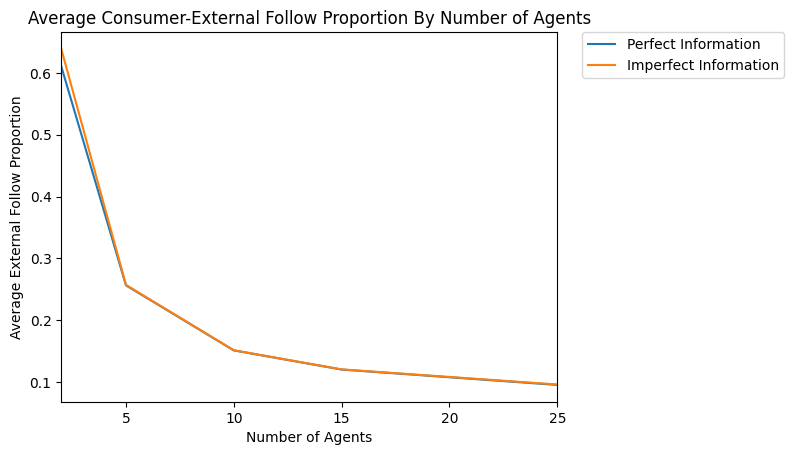

In [20]:
visualize.plot_ending_value_by_test(f"Average Consumer-External Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_external_follow_proportion', varied_param_values, varied_param_x_label, 'Average External Follow Proportion')

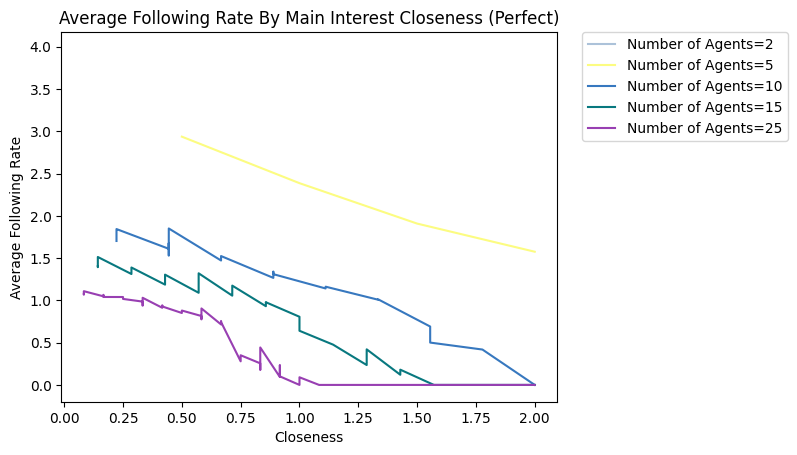

In [21]:
plt.figure()
for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    avg_rate_by_main_interest_closeness = perfect_stat.average_following_rate_by_main_interest_closeness
    if len(avg_rate_by_main_interest_closeness) == 0:
        continue
    closenesses = [x[0] for x in avg_rate_by_main_interest_closeness]
    rates = [x[1] for x in avg_rate_by_main_interest_closeness]
    min_rate = min(rates)
    max_rate = max(rates)
    #rates = [(x - min_rate) / (max_rate - min_rate) for x in rates]
    plt.plot(closenesses, rates, label=f"{varied_param_legend_label}={varied_param_values[i]}", color=palette[i])
plt.title(f"Average Following Rate By Main Interest Closeness (Perfect)")
plt.xlabel("Closeness")
plt.ylabel("Average Following Rate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [22]:
for i in range(num_agents):
    visualize.plot_agent_following_rates_by_test(i, [stat.consumer_stats for stat in perfect_info_stats], varied_param_legend_label, varied_param_values)

TypeError: 'list' object cannot be interpreted as an integer

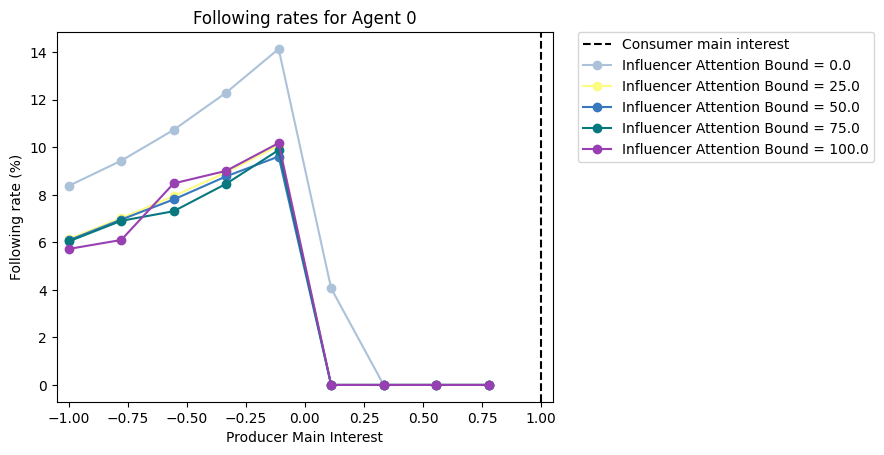

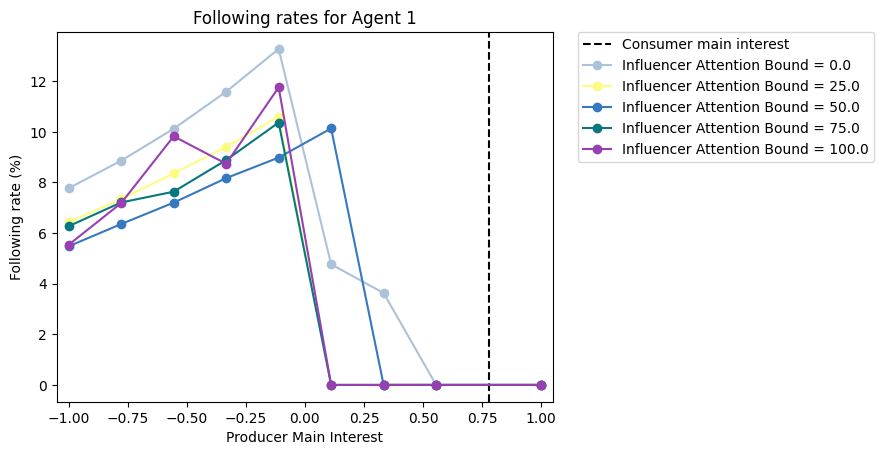

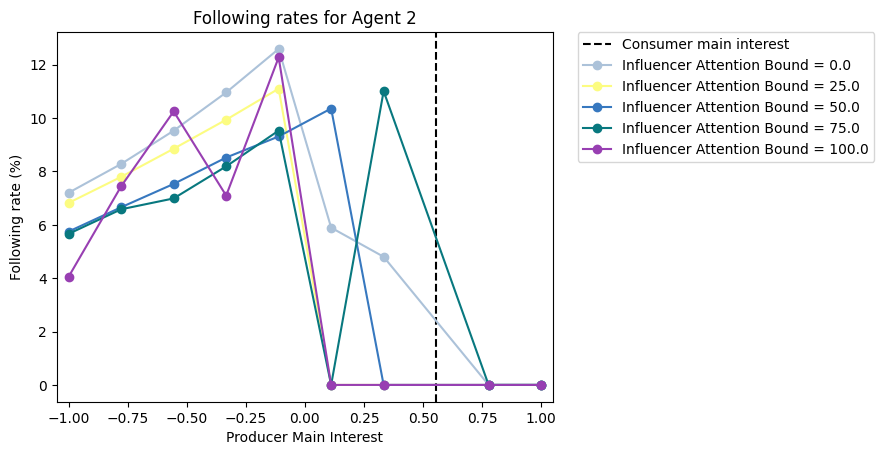

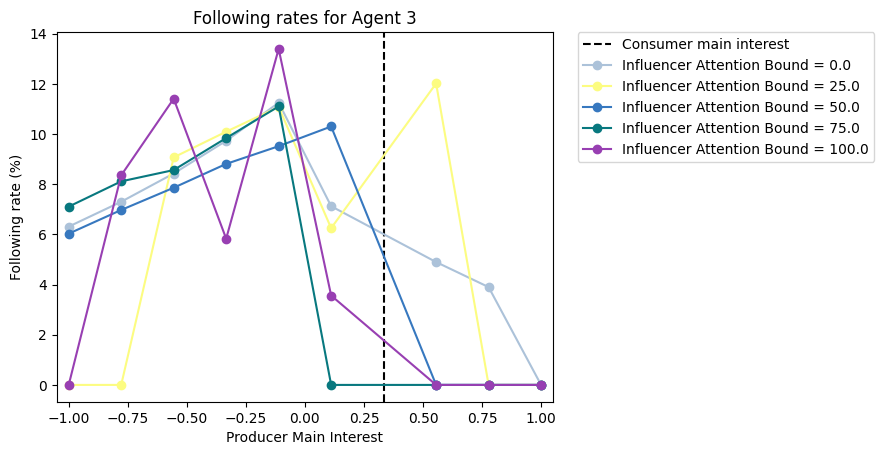

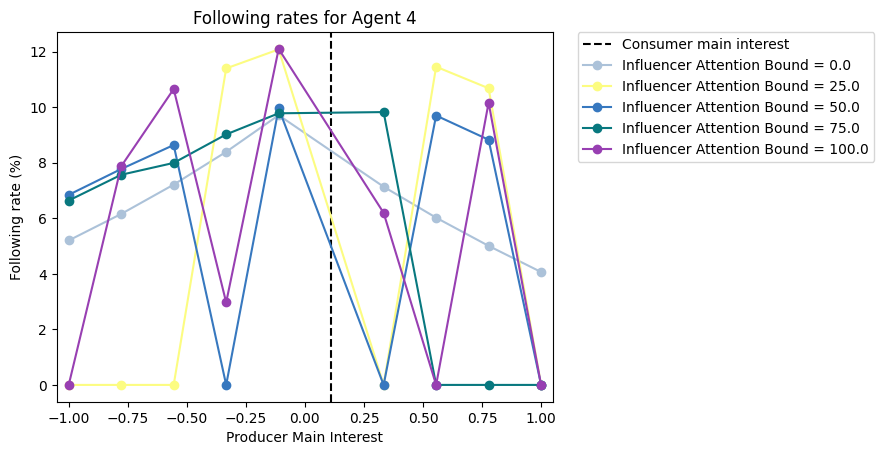

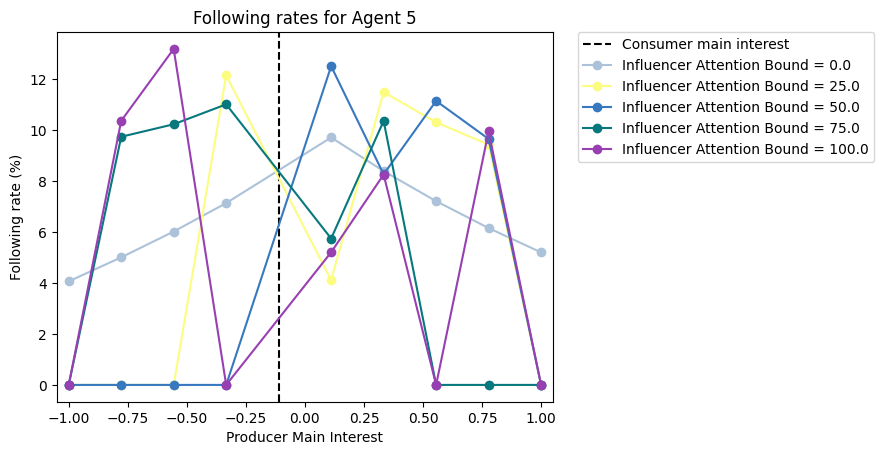

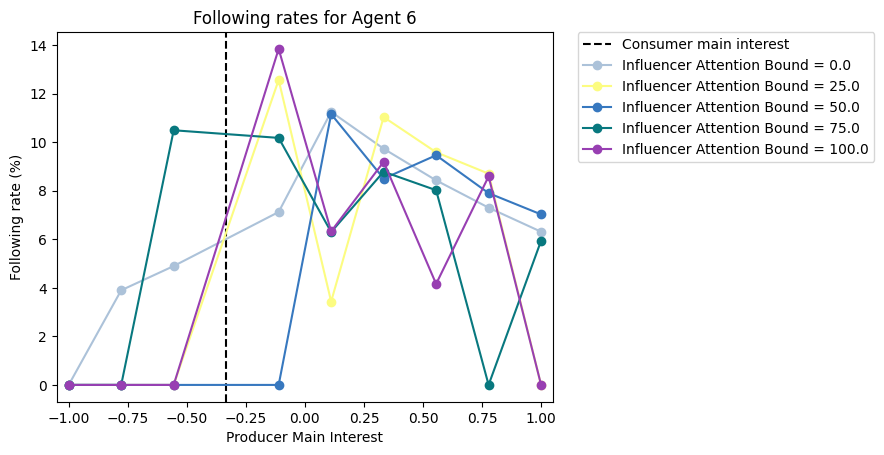

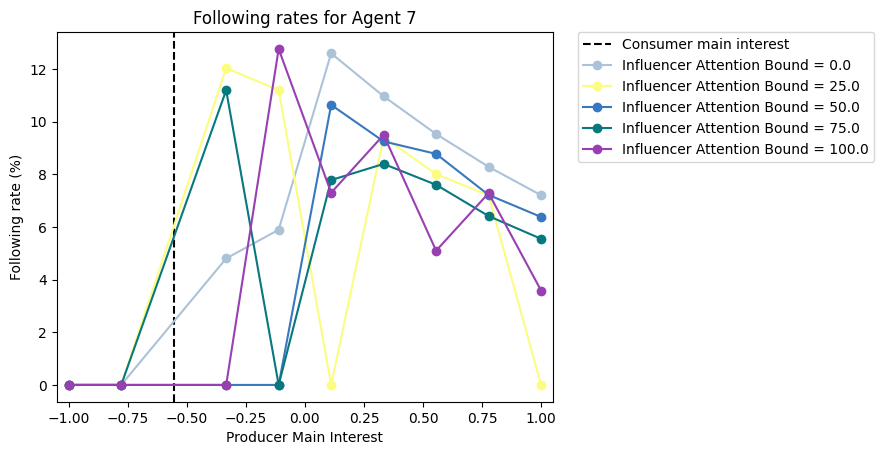

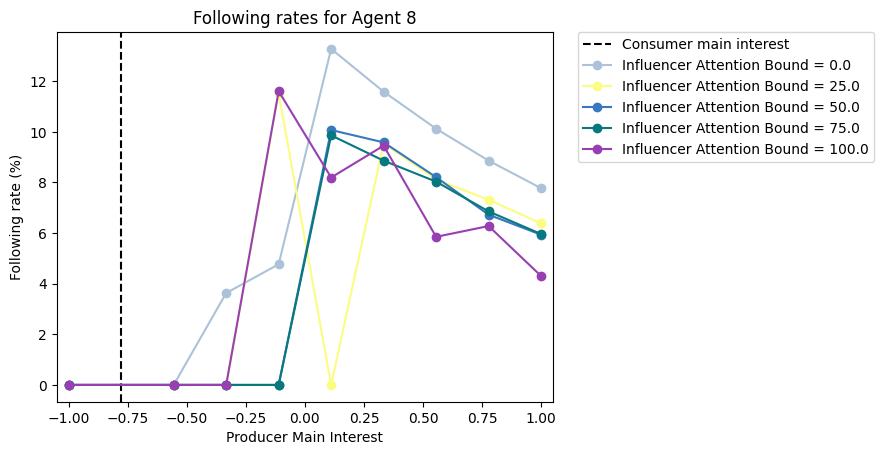

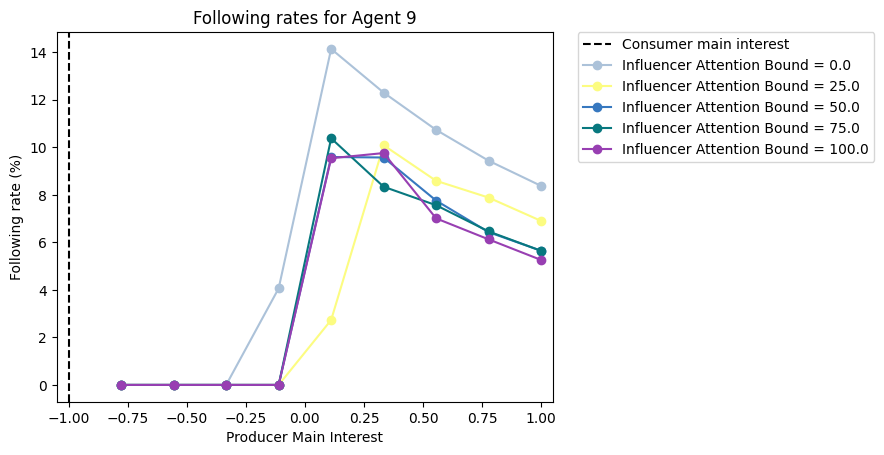

In [ ]:
for i in range(num_agents):
    visualize.plot_agent_following_rates_by_test(i, [stat.consumer_stats for stat in imperfect_info_stats], varied_param_legend_label, varied_param_values)

/var/folders/6q/4vwdpgt97yn2bsff6ptdg6pm0000gn/T/ipykernel_73256/2922184412.py:8: RuntimeWarning: invalid value encountered in scalar divide
  prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index] / influencer.attention_bound * 100) for prod in influencer.market.producers]


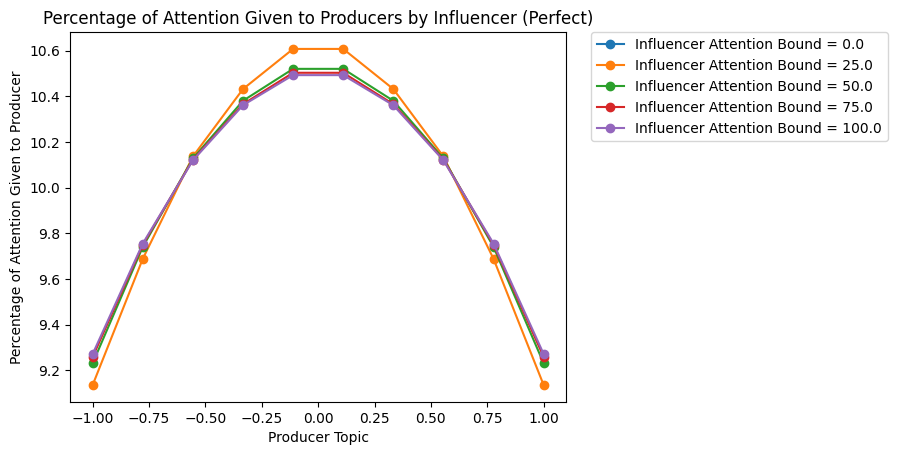

In [ ]:
#visualize.plot_agent_following_rates_by_test(num_agents, [stat.influencer_stats for stat in perfect_info_stats], varied_param_legend_label, varied_param_values)

for val, stat in zip(varied_param_values, perfect_info_stats):
    influencer_ind = num_agents
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index] / influencer.attention_bound * 100) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o')

plt.title(f"Percentage of Attention Given to Producers by Influencer (Perfect)")
plt.xlabel("Producer Topic")
plt.ylabel("Percentage of Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[2.39713258 2.54316687 2.65088481 2.73031929 1.58480879 2.76834424
 2.72982251 2.6577398  2.54335667 2.39442445 0.         0.        ]
[4.73877258 4.99531971 5.14913469 4.0217479  5.40398581 5.38688334
 5.33416092 5.20339646 5.01092591 4.75567268 0.         0.        ]
[7.18622182 7.55755436 7.84225193 8.04033793 5.65139477 8.13727343
 8.04248624 7.80726079 7.55558862 7.1796301  0.         0.        ]
[ 5.93071329 13.35896713  6.89447943 10.47085189  8.50925611 14.68243176
  7.64548214 14.17264197 12.70122192  5.63395436  0.          0.        ]


/var/folders/6q/4vwdpgt97yn2bsff6ptdg6pm0000gn/T/ipykernel_73256/2736067199.py:7: RuntimeWarning: invalid value encountered in scalar divide
  prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index] / influencer.attention_bound * 100) for prod in influencer.market.producers]


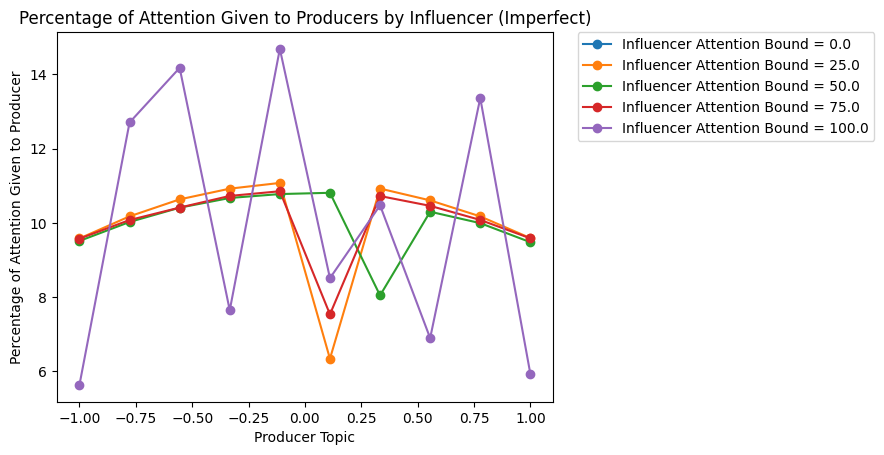

In [ ]:
for val, stat in zip(varied_param_values, imperfect_info_stats):
    influencer_ind = num_agents
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    print(following_rates)
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index] / influencer.attention_bound * 100) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o')

plt.title(f"Percentage of Attention Given to Producers by Influencer (Imperfect)")
plt.xlabel("Producer Topic")
plt.ylabel("Percentage of Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [ ]:
imperfect_info_stats[-4].influencer_stats[num_agents].following_rates[-1]

array([2.39713258, 2.54316687, 2.65088481, 2.73031929, 1.58480879,
       2.76834424, 2.72982251, 2.6577398 , 2.54335667, 2.39442445,
       0.        , 0.        ])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.0
[2.28416074 2.42217189 2.53408582 2.60784712 2.65173517 2.65173606
 2.60784818 2.53408391 2.42216977 2.28416134] 0.13301159798749093
[2.39713258 2.54316687 2.65088481 2.73031929 1.58480879 2.76834424
 2.72982251 2.6577398  2.54335667 2.39442445] 0.32993455486331896
[4.61588406 4.87041639 5.06381533 5.19002545 5.25985495 5.25985497
 5.19003006 5.06382112 4.87041399 4.61588369] 0.23325751240484155
[4.73877258 4.99531971 5.14913469 4.0217479  5.40398581 5.38688334
 5.33416092 5.20339646 5.01092591 4.75567268] 0.3966373777967754
[6.94469744 7.31248414 7.59191435 7.77403152 7.87688126 7.87694664
 7.77398918 7.59188669 7.31247355 6.94469523] 0.3373774875206178
[7.18622182 7.55755436 7.84225193 8.04033793 5.65139477 8.13727343
 8.04248624 7.80726079 7.55558862 7.1796301 ] 0.6948925759803262
[ 9.27222851  9.75548379 10.11942723 10.36060589 10.4922532  10.49225303
 10.3606694  10.11941495  9.75547485  9.27218915] 0.44183806

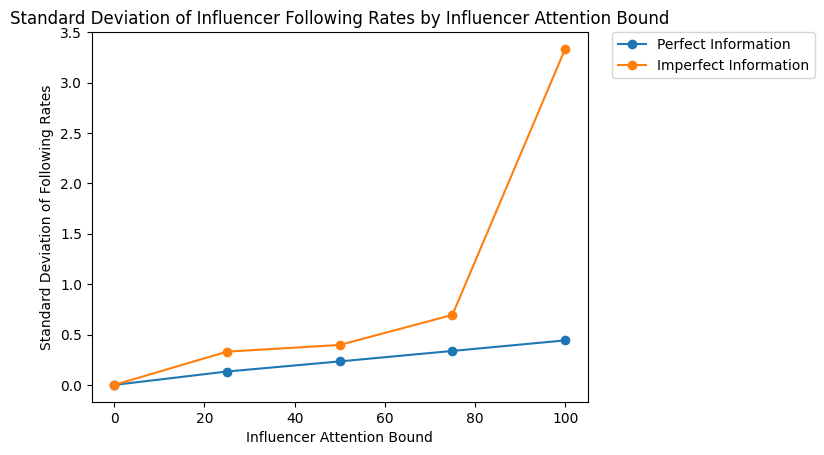

In [ ]:
perfect_following_rate_std_devs = []
imperfect_following_rate_std_devs = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    influencer_ind = num_agents
    perfect_influencer_stat = perf_stat.influencer_stats[influencer_ind]
    perfect_following_rates = perfect_influencer_stat.following_rates[-1][:num_agents]
    perfect_following_rates_std_dev = np.std(perfect_following_rates)
    print(perfect_following_rates, perfect_following_rates_std_dev)

    imperfect_influencer_stat = imperf_stat.influencer_stats[influencer_ind]
    imperfect_following_rates = imperfect_influencer_stat.following_rates[-1][:num_agents]
    imperfect_following_rates_std_dev = np.std(imperfect_following_rates)
    print(imperfect_following_rates, imperfect_following_rates_std_dev)

    perfect_following_rate_std_devs.append(perfect_following_rates_std_dev)
    imperfect_following_rate_std_devs.append(imperfect_following_rates_std_dev)

plt.figure()
plt.title(f"Standard Deviation of Influencer Following Rates by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Standard Deviation of Following Rates")
plt.plot(varied_param_values, perfect_following_rate_std_devs, label="Perfect Information", marker='o')
plt.plot(varied_param_values, imperfect_following_rate_std_devs, label="Imperfect Information", marker='o')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

/var/folders/6q/4vwdpgt97yn2bsff6ptdg6pm0000gn/T/ipykernel_73256/4106857289.py:8: RuntimeWarning: invalid value encountered in scalar divide
  following_rates = [(rate - min_rate) / (max_rate - min_rate) for rate in following_rates]


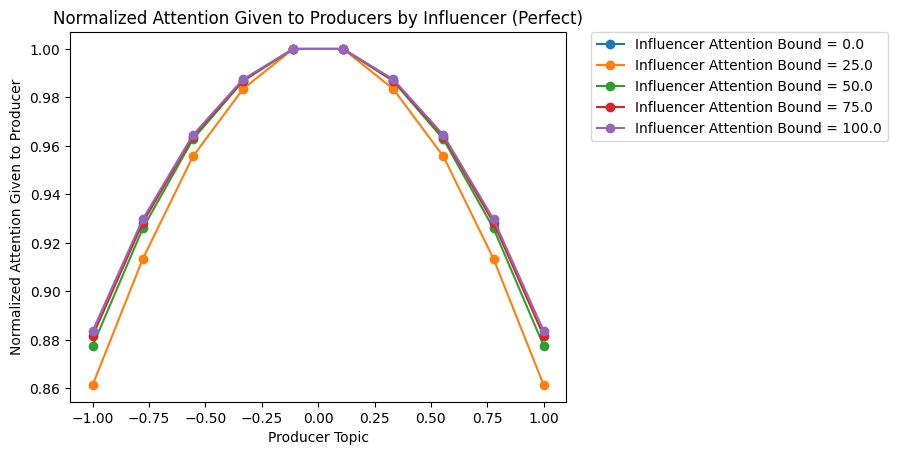

In [ ]:
for val, stat in zip(varied_param_values, perfect_info_stats):
    influencer_ind = num_agents
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    min_rate = min(following_rates)
    max_rate = max(following_rates)
    following_rates = [(rate - min_rate) / (max_rate - min_rate) for rate in following_rates]
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index]) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o')

plt.title(f"Normalized Attention Given to Producers by Influencer (Perfect)")
plt.xlabel("Producer Topic")
plt.ylabel("Normalized Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

/var/folders/6q/4vwdpgt97yn2bsff6ptdg6pm0000gn/T/ipykernel_73256/2908125049.py:8: RuntimeWarning: invalid value encountered in scalar divide
  following_rates = [(rate - min_rate) / (max_rate - min_rate) for rate in following_rates]


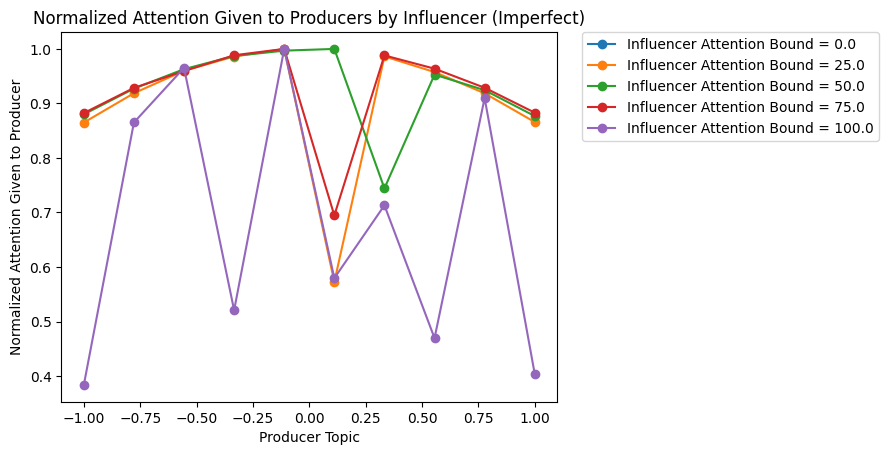

In [ ]:
for val, stat in zip(varied_param_values, imperfect_info_stats):
    influencer_ind = num_agents
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    min_rate = min(following_rates)
    max_rate = max(following_rates)
    following_rates = [(rate - min_rate) / (max_rate - min_rate) for rate in following_rates]
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index]) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o')

plt.title(f"Normalized Attention Given to Producers by Influencer (Imperfect)")
plt.xlabel("Producer Topic")
plt.ylabel("Normalized Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

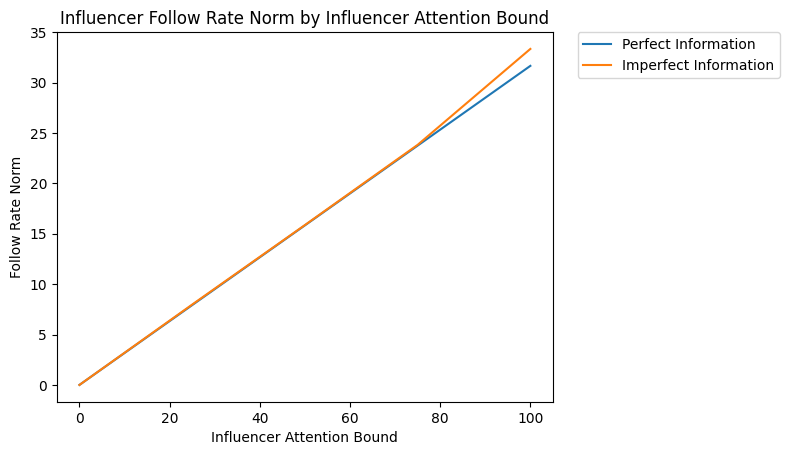

In [ ]:
perf_norms = []
imperf_norms = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    influencer_ind = num_agents
    perfect_influencer_stat = perf_stat.influencer_stats[influencer_ind]
    following_rates = perfect_influencer_stat.following_rates[-1]
    perf_norm = np.linalg.norm(following_rates)
    perf_norms.append(perf_norm)

    imperfect_influencer_stat = imperf_stat.influencer_stats[influencer_ind]
    following_rates = imperfect_influencer_stat.following_rates[-1]
    imperf_norm = np.linalg.norm(following_rates)
    imperf_norms.append(imperf_norm)

plt.plot(varied_param_values, perf_norms, label='Perfect Information')
plt.plot(varied_param_values, imperf_norms, label='Imperfect Information')
plt.title(f"Influencer Follow Rate Norm by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Follow Rate Norm")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

/var/folders/6q/4vwdpgt97yn2bsff6ptdg6pm0000gn/T/ipykernel_73256/3048140435.py:11: RuntimeWarning: invalid value encountered in scalar divide
  avg_difference_of_norms += (perf_norm - imperf_norm) / perf_norm * 100


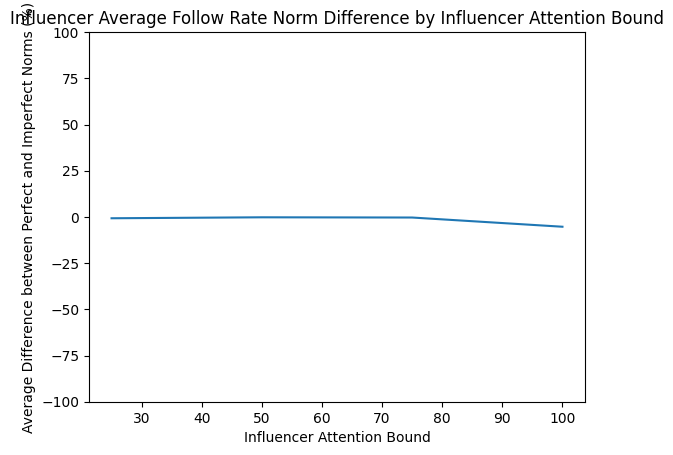

In [ ]:
difference_of_norms = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    avg_difference_of_norms = 0
    influencer_ind = num_agents
    perfect_influencer_stat = perf_stat.influencer_stats[influencer_ind]
    perf_following_rates = perfect_influencer_stat.following_rates[-1]
    perf_norm = np.linalg.norm(perf_following_rates)
    imperfect_influencer_stat = imperf_stat.influencer_stats[influencer_ind]
    imperf_following_rates = imperfect_influencer_stat.following_rates[-1]
    imperf_norm = np.linalg.norm(imperf_following_rates)
    avg_difference_of_norms += (perf_norm - imperf_norm) / perf_norm * 100
    avg_difference_of_norms /= len(perf_stat.influencer_stats)
    difference_of_norms.append(avg_difference_of_norms)

plt.plot(varied_param_values, difference_of_norms)
plt.title(f"Influencer Average Follow Rate Norm Difference by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Difference between Perfect and Imperfect Norms (%)")
plt.ylim(-100, 100)
plt.show()

nan
0.990007343000194
0.9969762996292263
0.9951375013355815
0.9531137571576358


/var/folders/6q/4vwdpgt97yn2bsff6ptdg6pm0000gn/T/ipykernel_73256/1620078180.py:8: RuntimeWarning: invalid value encountered in scalar divide
  print(np.dot(perf_following_rates, imperf_following_rates) / (np.linalg.norm(perf_following_rates) * np.linalg.norm(imperf_following_rates)))
/var/folders/6q/4vwdpgt97yn2bsff6ptdg6pm0000gn/T/ipykernel_73256/1620078180.py:9: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity = np.dot(perf_following_rates, imperf_following_rates) / (np.linalg.norm(perf_following_rates) * np.linalg.norm(imperf_following_rates))


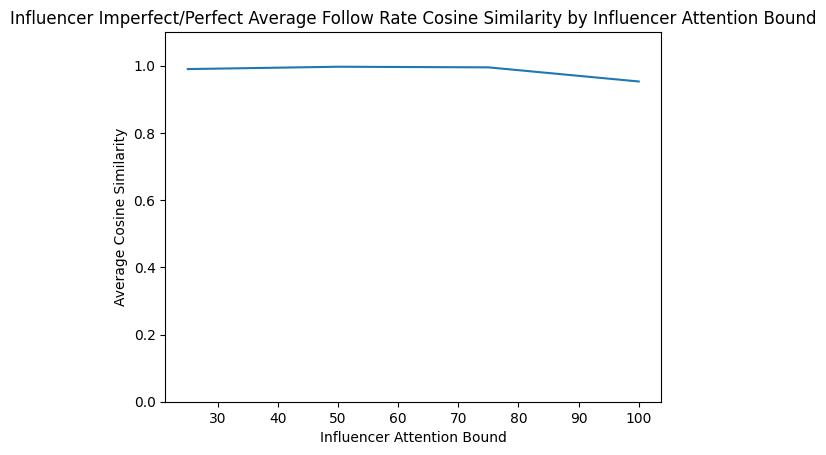

In [ ]:
cosine_similarities = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    influencer_ind = num_agents
    perfect_influencer_stat = perf_stat.influencer_stats[influencer_ind]
    perf_following_rates = perfect_influencer_stat.following_rates[-1]
    imperfect_influencer_stat = imperf_stat.influencer_stats[influencer_ind]
    imperf_following_rates = imperfect_influencer_stat.following_rates[-1]
    print(np.dot(perf_following_rates, imperf_following_rates) / (np.linalg.norm(perf_following_rates) * np.linalg.norm(imperf_following_rates)))
    cosine_similarity = np.dot(perf_following_rates, imperf_following_rates) / (np.linalg.norm(perf_following_rates) * np.linalg.norm(imperf_following_rates))
    cosine_similarities.append(cosine_similarity)

plt.plot(varied_param_values, cosine_similarities)
plt.title(f"Influencer Imperfect/Perfect Average Follow Rate Cosine Similarity by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Cosine Similarity")
plt.ylim(0, 1.1)
plt.show()

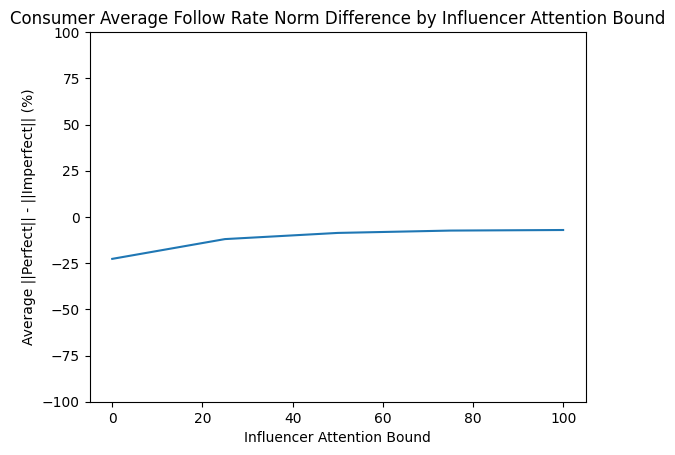

In [ ]:
difference_of_norms = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    avg_difference_of_norms = 0
    for consumer_ind in perf_stat.consumer_stats:
        perfect_consumer_stat = perf_stat.consumer_stats[consumer_ind]
        perf_following_rates = perfect_consumer_stat.following_rates[-1]
        perf_norm = np.linalg.norm(perf_following_rates)
        imperfect_consumer_stat = imperf_stat.consumer_stats[consumer_ind]
        imperf_following_rates = imperfect_consumer_stat.following_rates[-1]
        imperf_norm = np.linalg.norm(imperf_following_rates)
        avg_difference_of_norms += (perf_norm - imperf_norm) / perf_norm * 100
    avg_difference_of_norms /= len(perf_stat.consumer_stats)

    difference_of_norms.append(avg_difference_of_norms)

plt.plot(varied_param_values, difference_of_norms)
plt.title(f"Consumer Average Follow Rate Norm Difference by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average ||Perfect|| - ||Imperfect|| (%)")
plt.ylim(-100, 100)
plt.show()

[0.9263995053391156, 0.9587699769309908, 0.9660524334161803, 0.9731082894262038, 0.9616724539539379]


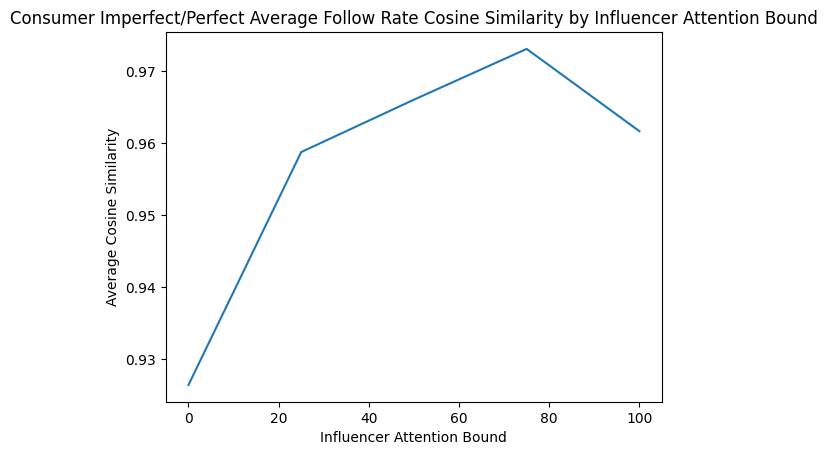

In [ ]:
cosine_similarities = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    avg_cosine_similarity = 0
    for consumer_ind in perf_stat.consumer_stats:
        perfect_consumer_stat = perf_stat.consumer_stats[consumer_ind]
        perf_following_rates = perfect_consumer_stat.following_rates[-1]
        imperfect_consumer_stat = imperf_stat.consumer_stats[consumer_ind]
        imperf_following_rates = imperfect_consumer_stat.following_rates[-1]
        avg_cosine_similarity += np.dot(perf_following_rates, imperf_following_rates) / (np.linalg.norm(perf_following_rates) * np.linalg.norm(imperf_following_rates))
    avg_cosine_similarity /= len(perf_stat.consumer_stats)
    cosine_similarities.append(avg_cosine_similarity)

plt.plot(varied_param_values, cosine_similarities)
print(cosine_similarities)
plt.title(f"Consumer Imperfect/Perfect Average Follow Rate Cosine Similarity by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Cosine Similarity")
plt.show()

In [ ]:
for stat in perfect_info_stats:
    print(stat.to_dict())

{'num_iterations': 4, 'total_consumer_utility': [0, 49.410424140691994, 53.14460104136397, 53.31137290338835, 53.32076046899894], 'total_producer_utility': [0, 22.873610214547263, 28.386042961877504, 28.58114612641821, 28.59645263336465], 'total_influencer_utility': [0, 0, 0, 0, 0], 'total_social_welfare': [0, 49.410424140691994, 53.14460104136397, 53.31137290338835, 53.32076046899894], 'average_consumer_rate_change': [0, 7.168309952097033, 3.5636556431276007, 0.25636318320717455, 0.17718293571399527], 'average_producer_topic_change': [0, 1.3908782823164405, 0.16959948753279047, 0.0604380816040882, 0.0042559536790109705], 'average_influencer_rate_change': [0, 0.0, 0.0, 0.0, 0.0], 'average_consumer_utility_change': [0, 4.9410424140692, 0.3734176900671992, 0.01667718620243743, 0.0009387565610583515], 'average_producer_utility_change': [0, 2.287361021454726, 0.551243274733024, 0.019510316454070996, 0.0015306506946438868], 'average_influencer_utility_change': [0, 0.0, 0.0, 0.0, 0.0], 'cons

In [ ]:
for stat in imperfect_info_stats:
    print(stat.to_dict())

{'num_iterations': 2, 'total_consumer_utility': [0, 35.05322564882417, 35.05322564882417], 'total_producer_utility': [0, 0, 0], 'total_influencer_utility': [0, 0, 0], 'total_social_welfare': [0, 35.05322564882417, 35.05322564882417], 'average_consumer_rate_change': [0, 7.168309952097033, 0.0], 'average_producer_topic_change': [0, 0.0, 0.0], 'average_influencer_rate_change': [0, 0.0, 0.0], 'average_consumer_utility_change': [0, 3.505322564882416, 0.0], 'average_producer_utility_change': [0, 0.0, 0.0], 'average_influencer_utility_change': [0, 0.0, 0.0], 'consumer_stats': {0: {'utilities': [0, 3.6704242563837797, 3.6704242563837797], 'utility_change': [0, 3.6704242563837797, 0.0], 'optimization_times': [0.04470604099333286, 0.0015026250621303916], 'following_rates': [array([0.        , 1.81818182, 1.81818182, 1.81818182, 1.81818182,
       1.81818182, 1.81818182, 1.81818182, 1.81818182, 1.81818182,
       1.81818182, 1.81818182]), array([0.        , 0.        , 0.        , 0.        , 0.8